# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


In [ ]:
import os

root_path = '/content/drive/MyDrive/Eksperimen_SML_Paulus-sebastian-firdaus'
path_raw = f'{root_path}/namadataset_raw'
path_preprocessing = f'{root_path}/preprocessing/namadataset_preprocessing'

os.makedirs(path_raw, exist_ok=True)
os.makedirs(path_preprocessing, exist_ok=True)

print("Folder diverifikasi dan siap digunakan.")

Folder diverifikasi dan siap digunakan.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:

!pip install mlflow==2.19.0 kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("Library berhasil diimpor.")

Library berhasil diimpor.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "iammustafatz/diabetes-prediction-dataset",
  "diabetes_prediction_dataset.csv",
)

df.to_csv(f'{path_raw}/diabetes_prediction_dataset.csv', index=False)

print("Dataset berhasil dimuat dan disimpan ke namadataset_raw.")
df.head()

Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Dataset berhasil dimuat dan disimpan ke namadataset_raw.


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

--- Jumlah Missing Values ---
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes   

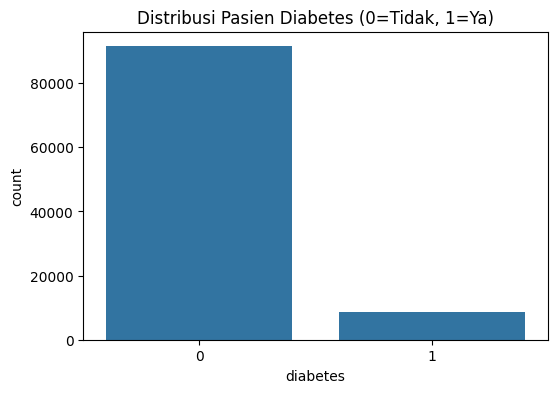

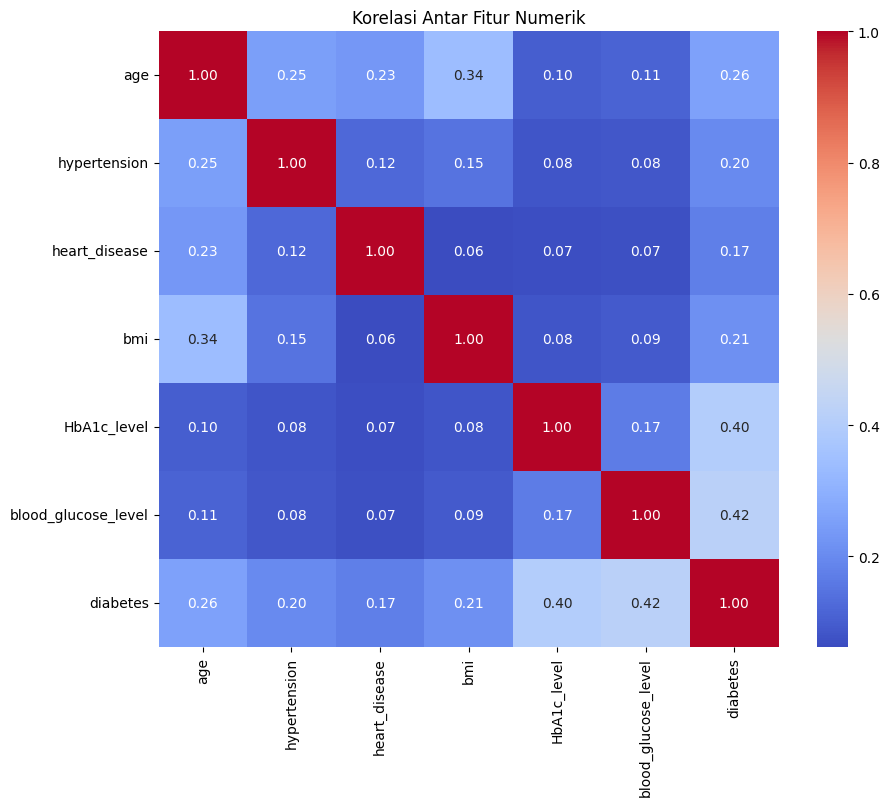

In [ ]:
# 1. Cek struktur data dan nilai kosong
print("--- Info Dataset ---")
print(df.info())
print("\n--- Jumlah Missing Values ---")
print(df.isnull().sum())

# 2. Visualisasi distribusi target (diabetes)
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df)
plt.title('Distribusi Pasien Diabetes (0=Tidak, 1=Ya)')
plt.show()

# 3. Heatmap Korelasi untuk fitur numerik
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Salin dataframe untuk pembersihan
df_clean = df.copy()

# 1. Menghapus data duplikat
df_clean = df_clean.drop_duplicates()
print(f"Jumlah baris setelah hapus duplikat: {len(df_clean)}")

# 2. Encoding Data Kategorikal
le = LabelEncoder()
df_clean['gender'] = le.fit_transform(df_clean['gender'])
df_clean['smoking_history'] = le.fit_transform(df_clean['smoking_history'])

# 3. Normalisasi/Scaling Fitur Numerik
scaler = StandardScaler()
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# 4. SIMPAN HASIL
output_file = f'{path_preprocessing}/diabetes_cleaned.csv'
df_clean.to_csv(output_file, index=False)

print(f"Preprocessing selesai! File bersih disimpan di: {output_file}")
df_clean.head()

Jumlah baris setelah hapus duplikat: 96146
Preprocessing selesai! File bersih disimpan di: /content/drive/MyDrive/Eksperimen_SML_Paulus-sebastian-firdaus/preprocessing/namadataset_preprocessing/diabetes_cleaned.csv


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.700840,-0.290050,4.848534,4,-0.314947,0.994563,0.043554,0
1,0,0.543372,-0.290050,-0.206248,0,-0.000216,0.994563,-1.423096,0
2,1,-0.614096,-0.290050,-0.206248,4,-0.000216,0.155970,0.483549,0
3,0,-0.257952,-0.290050,-0.206248,1,-0.572051,-0.496269,0.410216,0
4,1,1.522768,3.447677,4.848534,1,-1.061141,-0.682623,0.410216,0
